In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Carica il dataset Wine
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Mostra le prime righe del dataset
X.head(), y.head()


(   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
 0    14.23        1.71  2.43               15.6      127.0           2.80   
 1    13.20        1.78  2.14               11.2      100.0           2.65   
 2    13.16        2.36  2.67               18.6      101.0           2.80   
 3    14.37        1.95  2.50               16.8      113.0           3.85   
 4    13.24        2.59  2.87               21.0      118.0           2.80   
 
    flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
 0        3.06                  0.28             2.29             5.64  1.04   
 1        2.76                  0.26             1.28             4.38  1.05   
 2        3.24                  0.30             2.81             5.68  1.03   
 3        3.49                  0.24             2.18             7.80  0.86   
 4        2.69                  0.39             1.82             4.32  1.04   
 
    od280/od315_of_diluted_wines  proline  
 0  

In [2]:
# Statistiche descrittive di base
X.describe()

# Controlla che non ci siano valori mancanti
missing_values = X.isnull().sum()

missing_values


alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

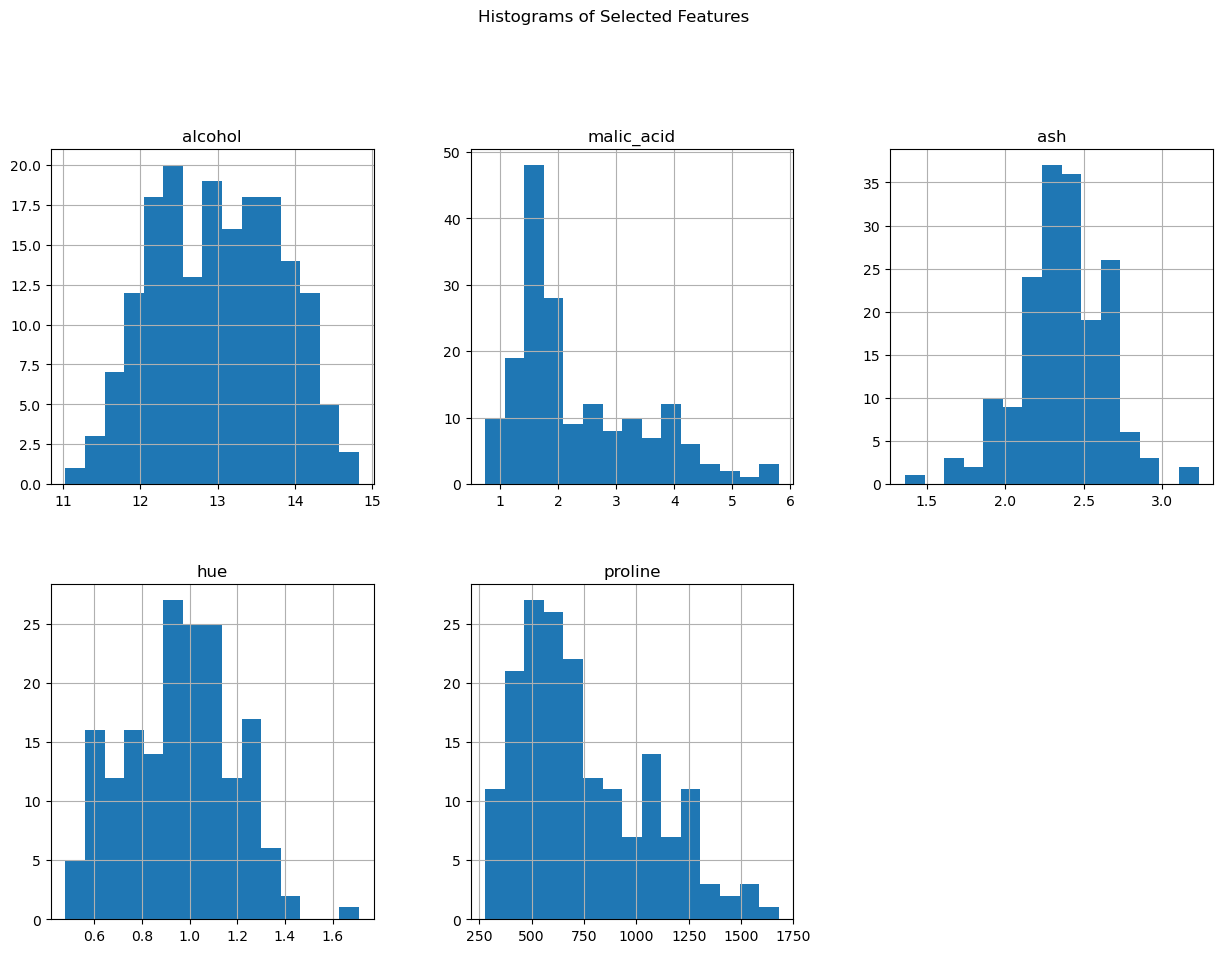

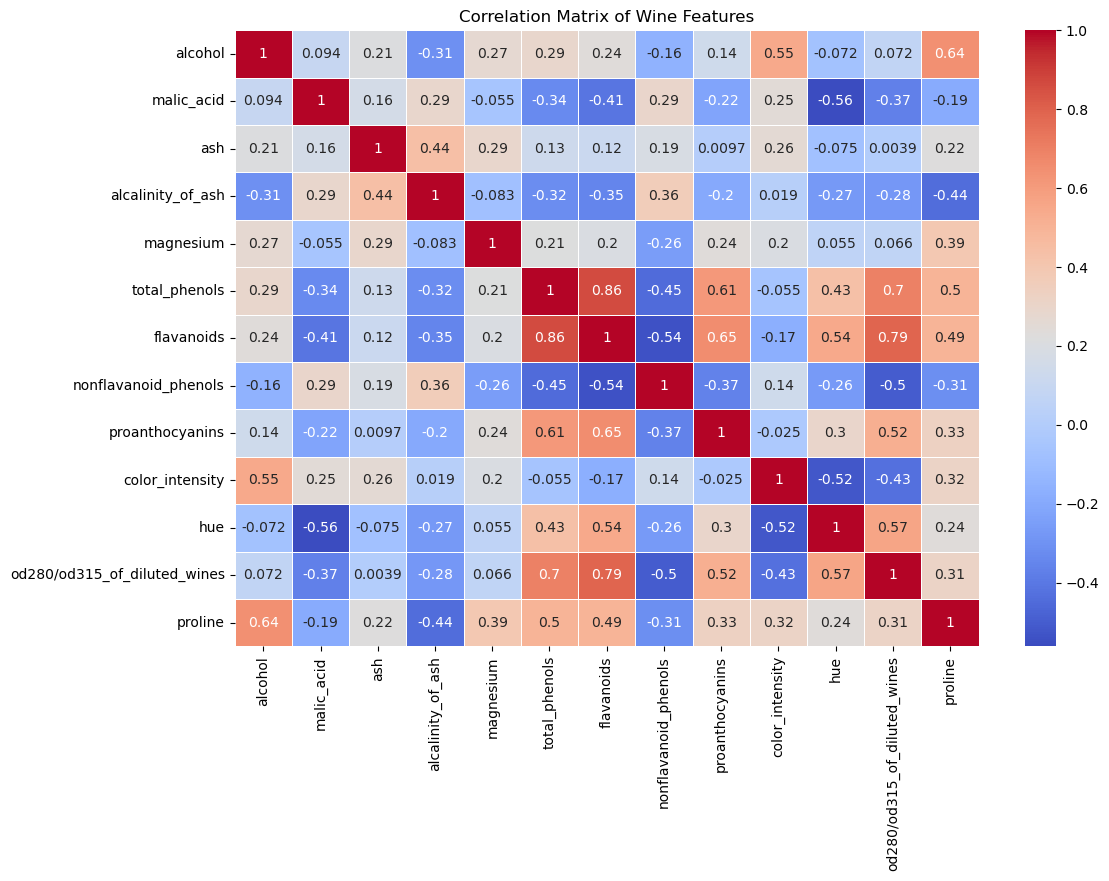

In [3]:
# Mostra istogrammi per alcune feature per comprendere la loro distribuzione
X[['alcohol', 'malic_acid', 'ash', 'hue', 'proline']].hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.suptitle("Histograms of Selected Features", y=1.02)

# Visualizza la matrice di correlazione con una heatmap
plt.figure(figsize=(12, 8))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Wine Features")

plt.show()

In [4]:
# Preprocessing dei dati

# Standardizzazione dei dati
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Divisione del dataset in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [6]:
# Addestramento del modello

# Scelta del modello: Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Definizione della griglia di iperparametri per GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Ottimizzazione degli iperparametri con GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Migliori iperparametri trovati
best_params = grid_search.best_params_
print("Migliori iperparametri trovati:", best_params)

# Modello finale addestrato con i migliori iperparametri
best_rf_model = grid_search.best_estimator_

Migliori iperparametri trovati: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


Accuracy sul set di test: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Confusion Matrix:


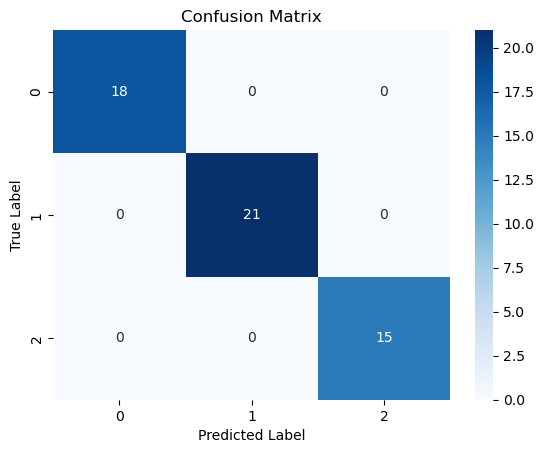

In [7]:
# Valutazione del modello

# Predizioni sul set di test
y_pred = best_rf_model.predict(X_test)

# Calcolo dell'accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy sul set di test:", accuracy)

# Report di classificazione
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Matrice di confusione
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

Feature ranking:
1. color_intensity (0.1649)
2. flavanoids (0.1547)
3. alcohol (0.1460)
4. proline (0.1425)
5. od280/od315_of_diluted_wines (0.0949)
6. hue (0.0944)
7. total_phenols (0.0525)
8. malic_acid (0.0360)
9. magnesium (0.0337)
10. alcalinity_of_ash (0.0305)
11. proanthocyanins (0.0229)
12. nonflavanoid_phenols (0.0151)
13. ash (0.0120)


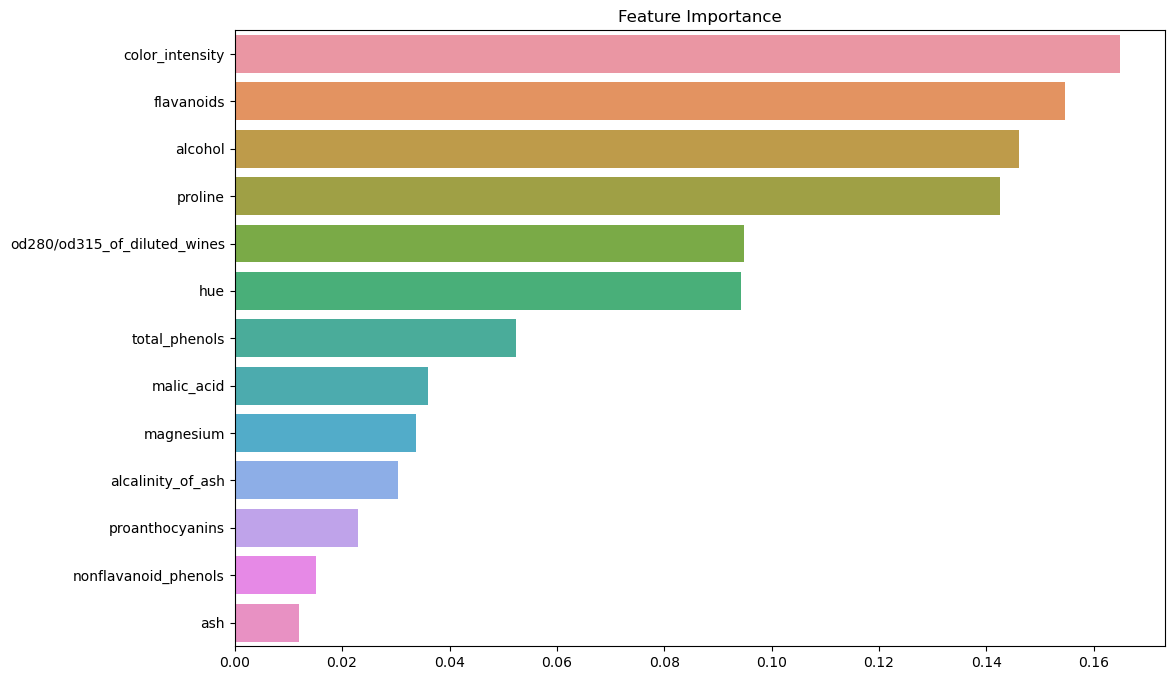

In [8]:
# Importanza delle feature
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Stampa delle feature per importanza
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. {X.columns[indices[f]]} ({importances[indices[f]]:.4f})")

# Visualizzazione delle importanze
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance")
plt.show()
